<a href="https://colab.research.google.com/github/JuanBalde/Juan-y-Patricio-Facultad/blob/main/TP_2_Densiometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

def Plot_CI(X:list,CI_lower:list,CI_upper:list,Color='gray',Transparencia=0.4,Label=''):
    #plt.plot(X,CI_upper,color=Color)
    #plt.plot(X,CI_lower,color=Color)
    plt.fill_between(
        x=X,
        y1=CI_lower,
        y2=CI_upper,
        color=Color,
        alpha=Transparencia,
        label=Label
    )

def Densidad_sc(m_t,vol_p:float,err_mt,err_vol_p:float):
    densidad_sc= m_t/vol_p
    error_densidad_sc= abs(1/vol_p)*err_mt
    error_densidad_sc+= abs(-m_t/vol_p**2)*err_vol_p

    return densidad_sc,error_densidad_sc

El volumen corregido del picnometro es 12.167 +/- 0.005 ml
La fraccion masica de acetona en las soluciones armadas son:[0.06270148 0.15195329 0.21105396 0.31890698 0.38660354 0.47099002
 0.63833279 0.73632284 1.        ]


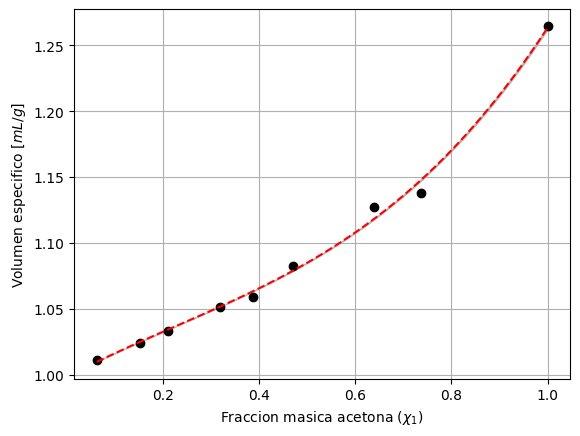

In [ ]:
T = 22.5 # °C
den_W = (0.997800 + 0.997568)/2 # g/ml (hice un promedio de las densidades de 22 y 23 °C porque estabamos a 22.5°C, se que no esta del todo bien, pero es una aproximacion)
Mp = 11.335 # g
Calibración = [23.479, 23.471, 23.471] # g

m_ac = np.array([1.556, 3.878, 5.462 + 26.792 - 26.633, 7.796, 9.935+2.151, 12.274, 15.560, 17.361 + 2.491, 25]) # g
m_final = np.array([24.816, 25.521, 26.633, 24.446, 31.262, 26.060, 24.376, 26.961, 25]) # g
err_m_ac = np.array([0.001]*len(m_ac))
err_m_final = err_m_ac




m1 = np.array([23.366, 23.219, 23.114, 22.908, 22.819, 22.578, 22.126, 22.028, 20.945]) - Mp # g
m1_dup = np.array([23.366, 23.219, 23.118, 22.904, 22.825, 22.566, 22.128, 22.028, 20.964]) - Mp # g

def X_ac(m_ac,m_tot):
  X_ac = m_ac/m_tot
  return(X_ac)

m1 = m1 # g
m2 = m1_dup # g
m = (m1 + m2)/2 # g
err_m = np.array([0.002]*len(m))


mw_p = np.mean(Calibración) - Mp  # g
err_mw_p=np.std(Calibración)+0.001 # g
VolC_P = mw_p/den_W # ml
err_VolC_P =  abs(1/den_W)*err_mw_p

X_ac = X_ac(m_ac, m_final)
err_X_ac=abs(1/m_final)*err_m_ac+abs(X_ac/m_final)*err_m_final



print(f"El volumen corregido del picnometro es {VolC_P:.3f} +/- {err_VolC_P:.1g} ml")

VolE = VolC_P/m
err_VolE = abs(1/m)*err_VolC_P + abs(VolE/m)*err_m

#1)

plt.plot(X_ac, VolE, 'ko')

#la std dió tan chica que ni vale la pena agregar barras de error
#plt.errorbar(
#    x=X_ac,
#    y=VolE,
#    xerr=err_X_ac,
#    yerr=err_VolE,
#    fmt='kx',
#)
plt.xlabel("Fraccion masica acetona $(\chi_1)$")
plt.ylabel("Volumen especifico $[mL/g]$")
plt.grid()

#2)

def F_ajustar(x,a,b,c,d):
  return a*x**3+b*x**2+c*x+d
Parametros,paramcovarp = curve_fit(F_ajustar, X_ac, VolE)
err_Parametros = np.diagonal(paramcovarp)**2

x = np.linspace(X_ac.min(), X_ac.max(), 100)

plt.plot(x, F_ajustar(x, *Parametros), 'r--')

plt.savefig("Figura con ajuste.png",dpi=300,bbox_inches='tight')

#tampoco fue necesario graficar intervalode confianza, porque ajusta tan bien que no lo veo en la escala
Plot_CI(
    X=x,
    CI_lower=F_ajustar(x,*Parametros-err_Parametros),
    CI_upper=F_ajustar(x,*Parametros+err_Parametros),
    )

#aca vienen las derivadas pero primero hay que meter los ajustes

print(f"La fraccion masica de acetona en las soluciones armadas son:{X_ac}")

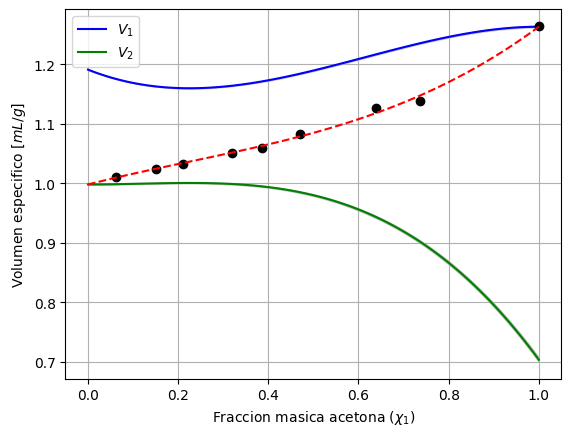

In [ ]:
#3)

a,b,c,d = Parametros
err_a,err_b,err_c,err_d = err_Parametros

x = np.linspace(0,1,100)
dVdx = 3*a*x**2+2*b*x+c
err_dVdx = abs(3*x**2)*err_a + abs(2*x)*err_b + err_c

V = F_ajustar(x,*Parametros)
err_V = abs(x**3)*err_a + x**2 * err_b + x*err_c +err_d

V1 = V + (1-x)*dVdx  #Ecuación 14
err_V1 = err_V + abs(1-x)*err_dVdx
V2 = V - x*dVdx      #Ecuación 15
err_V2 = err_V + err_dVdx


#4)
plt.plot(x, V1, 'b-', label = '$V_1$')
Plot_CI(x, V1 - err_V1, V1 + err_V1)
plt.plot(x, V2, 'g-', label = '$V_2$')
Plot_CI(x, V2 - err_V2, V2 + err_V2)
plt.plot(X_ac, VolE, 'ko')
plt.plot(x, F_ajustar(x, *Parametros), 'r--')
plt.xlabel("Fraccion masica acetona ($\chi_1$)")
plt.ylabel("Volumen especifico $[mL/g]$")
plt.legend()
plt.grid()
plt.savefig('figura con volumenes parciales.png',dpi=300,bbox_inches='tight')

In [ ]:
!pwd

/content


In [ ]:
#5)

Parametros_1,paramcovarp1 = curve_fit(F_ajustar, x, V1)
Parametros_2,paramcovarp2 = curve_fit(F_ajustar, x, V2)

VPuro_1 = F_ajustar(np.array([0,1]),*Parametros_1)
VPuro_2 = F_ajustar(np.array([0,1]),*Parametros_2)

print(f"El Volumen especifico de la acetona pura a {T}°C es {VPuro_1[-1]:.3F} +/- {err_V1[-1]:.3F}g/ml")
print(f"El Volumen especifico del agua pura a {T}°C es {VPuro_2[0]:.5F} +/- {err_V2[0]:.5F}g/ml\n")
print(f"El Volumen especifico a dilución infinita de la acetona a {T}°C es {VPuro_1[0]:.5F} +/- {err_V1[0]:.5F} g/ml")
print(f"El Volumen especifico a dilución infinita del agua a {T}°C es {VPuro_2[1]:.3F} +/- {err_V2[-1]:.3F}g/ml")

El Volumen especifico de la acetona pura a 22.5°C es 1.263 +/- 0.001g/ml
El Volumen especifico del agua pura a 22.5°C es 0.99804 +/- 0.00004g/ml

El Volumen especifico a dilución infinita de la acetona a 22.5°C es 1.19130 +/- 0.00004 g/ml
El Volumen especifico a dilución infinita del agua a 22.5°C es 0.703 +/- 0.004g/ml


In [ ]:
#Bibliografia:

#Acetona: https://dokumen.tips/documents/densidad-de-la-acetona-a-diferentes-temperaturas.html?page=1
Densidad_20C = 0.800831987 #g/mol
Densidad_25C = 0.795099131 #g/mol

DenAc = (Densidad_20C + Densidad_25C)/2
VE_Ac = 1/DenAc

print(((VPuro_1[-1] - VE_Ac)*100)/VPuro_1[-1])

#Agua: https://filadd.com/doc/tablas-de-pv-y-densidad-del-agua-pdf-quimica
Densidad_22_5C = 0.997656 #g/mol
VA_Ag = 1/Densidad_22_5C

print((VPuro_2[0] - VA_Ag)*100/VPuro_2[0])

0.8155302537600303
-0.432278754525536


In [ ]:
densidad_sc,err_densidad_sd= Densidad_sc(
    m_t=m_final,
    vol_p=VolC_P,
    err_mt=np.array([0.001]*len(m)),
    err_vol_p=err_VolC_P
)
# El csv que tenemos que mandar junto con el informe
dict_df={
    "m_total":m_final,
    #"err_m_total":[0.0001]*(len(m)-1)+np.std(Calibración),
    "m_acetona":m_ac,
    "X_acetona":X_ac,
    "err_X_acetona":err_X_ac,
    "V_especifico":VolE,
    "err_V_especifico":err_VolE,
    "densidad":densidad_sc,
    "err_densidad":err_densidad_sd,
}

df=pd.DataFrame(dict_df)

#densidad_sc,err_densidad_sd= Densidad_sc(
#    mt=df.m_total,
#    m_ac=df.m_acetona,
#    densidad_agua=den_W,
#    err_mt
#)
df.to_csv('G2_TN_desiometria_datos.csv',sep=',',index=False)
df

,m_total,m_acetona,X_acetona,err_X_acetona,V_especifico,err_V_especifico,densidad,err_densidad
0,24.816,1.556,0.062701,0.000043,1.011291,0.000566,2.039641,0.000884
1,25.521,3.878,0.151953,0.000045,1.023800,0.000575,2.097586,0.000907
2,26.633,5.621,0.211054,0.000045,1.032751,0.000581,2.188982,0.000943
3,24.446,7.796,0.318907,0.000054,1.051495,0.000595,2.009231,0.000872
4,31.262,12.086,0.386604,0.000044,1.059184,0.000601,2.569442,0.001092
5,26.060,12.274,0.470990,0.000056,1.082749,0.000618,2.141886,0.000924
6,24.376,15.560,0.638333,0.000067,1.127395,0.000652,2.003477,0.000870
7,26.961,19.852,0.736323,0.000064,1.137833,0.000660,2.215940,0.000953
8,25.000,25.000,1.000000,0.000080,1.264811,0.000760,2.054764,0.000890


# Exporto Tablas a Latex

In [ ]:
# Exportar datos a latex
def redondeo(numero:float,error:float,debug=False,notacion_cientifica=True):
    """
    Redondea cifras significativas.
    Devuelve 'numero $\pm$ error' redondeado como str
    """
    if error<numero:#error<1:
        #busco en que decimal está la primer cifra siginificativa del error
        err_str=str(error).split('.')[-1]
        if debug==True:
            print(err_str)
        if 'e' not in err_str:

            decimal=0
            for i in err_str:
                if i!='0':
                    break
                    if debug==True:
                        print(i)
                    decimal+=1
                decimal+=1
            decimal+=1

            return f"{np.round(numero,decimal)}"+r" $\pm$ "f"{np.round(error,decimal)}"
        else:
                err_str=err_str.split('e')[-1]
                decimal=int(err_str)*-1
                if notacion_cientifica==False:
                    return f"{np.round(numero,decimal):F}"+r" $\pm$ "f"{np.round(error,decimal):F}"

                return f"{np.round(numero,decimal)}"+r" $\pm$ "f"{np.round(error,decimal)}"
    else:
        #cuando lo necesite lo hago
        print(f"{error}>{numero}")
        return f"{numero:.2g}"+r" $\pm$ "f"{error:.1g}"


def Tabla_Latex(df:pd.DataFrame,label:str,caption:str,alineado='c',):
    n_row=len(df.axes[0])
    n_col=len(df.axes[1])
    columns=df.columns

    #las partes de la tabla
    pattern0='''\\begin{table}[]\n\\centering\n\\begin{tabular}{@{}'''+alineado*n_col
    pattern1='@{}}\n\\toprule\n'
    pattern2=''

    pattern3="\\end{tabular}\n\\label{tab:"+label+"}\n\\end{table}"
    if caption!=None:
        pattern3= "\n\\end{tabular}\n\\caption{"+caption+"}\n\\label{tab:"
        pattern3+= label+"}\n\\end{table}"


    #las columnas de la tabla
    for i in range(n_col):
        if i==n_col-1:
            pattern2+=columns[i]+" \\\\ \\midrule\n"
        else:
            pattern2+=columns[i]+" & "

    #el contenido de la tabla
    content=[]
    for row in range(n_row):
        row_content=''
        for columna in columns:
            index=df.index[row]
            cell=df[columna].iloc[row]
            temp_row=str(cell)+" & "
            if columna==columns[-1]:
                temp_row=str(cell)+" \\\\"
            row_content+=temp_row
 	err_I 	XB2- 	err_XB2- 	XHB 	err_XHB 	B2- 	err_B2- 	BH-

####################################################################################################

exporto_fracciones= (redondeo(df.X_acetona.iloc[i],df.err_X_acetona.iloc[i],notacion_cientifica=False) for i in range(len(df)))
exporto_densidades= (redondeo(df.densidad.iloc[i],df.err_densidad.iloc[i]) for i in range(len(df)))
exporto_Ve=(redondeo(df.V_especifico.iloc[i],df.err_V_especifico.iloc[i]) for i in range(len(df)))

df_export=pd.DataFrame({
    "$\\chi_{ac}$":exporto_fracciones,
    "$\\rho_{sc} [g/mL]$":exporto_densidades,
    "$\overline{V} [mL/g]$":exporto_Ve
})
df_export
Tabla_Latex(df_export,label="densidades",caption="desidades de las soluciones obtenidas con el picnómetro")

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-10-b4975b29f587>, line 72)

In [ ]:
df_export.style().hide_

# Probando cosas para el Recuperatorio del parcialito

## 1) Encontrar los volúmenes parciales molares $V_A$ y $V_B$ ($A = H_2O$ y $B = NaCl$) en la mezcla binaria, en función del número de moles de $n_B$.

$V = α + βn_B + γn^{3/2}_B + δn^2_B$

$\frac{dV}{dn_B}=V_B$ ($n_A$ es constante)

$\frac{dV}{dn_B} =  β + \frac{3}{2}γn^{1/2}_B + 2δn_B$

Tambien sabemos que $V=n_AV_A + n_BV_B$ y $n_A = 1 - n_B$

$(V-n_BV_B)/n_A=V_A $ Lo queremos en funcion de $n_B$

$(α + βn_B + γn^{3/2}_B + δn^2_B-n_B(β + \frac{3}{2}γn^{1/2}_B + 2δn_B)/n_A=V_A$ Para este tambien suponemos que el $n_A$ es constante.

$(α - \frac{1}{2}γn^{3/2}_B - δn_B^2)/n_A=V_A$

In [ ]:
Alfa = 1002.96 # ml
Beta = 16.6253 # ml/mol
Gamma = 1.7738 # cm^3/mol^3/2
Delta = 0.1194 # cm^3/mol^2

MrH2O = 18 # g/mol

nA = 1000/MrH2O # g de agua a mol

def VB(n):
  VB = Beta + 3/2*Gamma*n**(1/2) + 2*Delta*n
  return VB

def VA(n):
  VA = 1/nA*(Alfa - 1/2*Gamma*n**(3/2) - Delta*n**2)
  return VA

## 2) Verificar la relación de Gibbs-Duhem para los volúmenes parciales molares encontrados.

$\frac{n_A}{n_B}\frac{V_A}{n_B}=\frac{V_B}{n_B}$ o  $0=n_AdV_A + n_BdV_B$ (En el trabajo lo muestran como $\chi$ pero es la fraccion molar, lo mismo que moles en este caso) No te olvides de los diferenciales pelotudo!!

$n_AdV_A + n_BdV_B=n_A(-\frac{3}{4}γn^{1/2}_B-2δn_B)/n_A+n_B(\frac{3}{4}γn^{-1/2}_B + 2δ)=(-\frac{3}{4}γn^{1/2}_B-2δn_B)+(\frac{3}{4}γn^{1/2}_B + 2δn_B)=0$



## 3) Calcular el volumen parcial molar a dilución infinita de NaCl en agua, $V_∞ NaCl(H_2O)$.

Se debe hacer el limite con $n_B→0$ de $V_B$

In [ ]:
print(f"V_B a dilucion infinita es {VB(0):.2f} cm^3")

## 4) Determinar el volumen de 100 g de solución acuosa saturada de NaCl, cuya concentración es de 359 g/L.

In [ ]:
MrNaCl = 58.45 # g/mol

V = 1000 # ml
nB = 359/MrNaCl # g a mol

nA = (V - nB*VB(nB))/VA(nB) # mol

Den = (nA*18 + nB*58.45)/V # g/ml

V_100 = 100/Den # ml

print(f"{nA = :.2f} mol, {Den = :.2f} g/ml, {V_100 = :.2f} ml")

## Practicando para el parcialito

In [ ]:
MrH2O = 18 # g/mol
MrProp = 60.0952 # g/mol

DenH2O = 1 #g/ml
DenProp = 0.8029 #g/ml

VH2O = MrH2O/DenH2O # ml/g
VProp = MrProp/DenProp # ml/g

print(f"{VH2O = :.2f} ml/mol, {VProp = :.2f} ml/mol")

VH2O = 18.00 ml/mol, VProp = 74.85 ml/mol
